In [1]:
# random forest

In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import re
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import sklearn.tree as tree
import random

In [18]:
os.getcwd()
# from thon.Choose import choose_features
from thon.churn_functions import modernize, tree_importance, plot_eval, bake
#data = choose_features("data/out/features.csv", cv_range = (0, 30), save = False)

In [3]:
data = pd.read_csv("data/out/features.csv")

In [4]:
X, y = data.drop(columns = ['n']), data['n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle = False)

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state = 25,
                                   bootstrap=False,
                                   max_features="sqrt",
                                   n_estimators=250))
])

In [9]:
search = GridSearchCV(pipeline,
                      {'model__max_depth':np.arange(1, 5, 1)},                      
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 1)

In [10]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(bootstrap=False,
                                                              max_features='sqrt',
                                                              n_estimators=250,
                                                              random_state=25))]),
             param_grid={'model__max_depth': array([1, 2, 3, 4])},
             scoring='neg_mean_squared_error', verbose=1)

In [12]:
search.best_params_.get("model__max_depth")

4

In [34]:
# Training data

# Train the model
rfmodel = RandomForestRegressor(random_state = 25,
                                          bootstrap=False,
                                          max_features="sqrt",
                                          n_estimators=250,
                                          max_depth = search.best_params_.get("model__max_depth"))
rfmodel.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
pred_train = pd.Series(rfmodel.predict(X_train), index=X_train.index)
pred_test = pd.Series(rfmodel.predict(X_test), index=X_test.index)

566.9025425068685
4.19927809264347


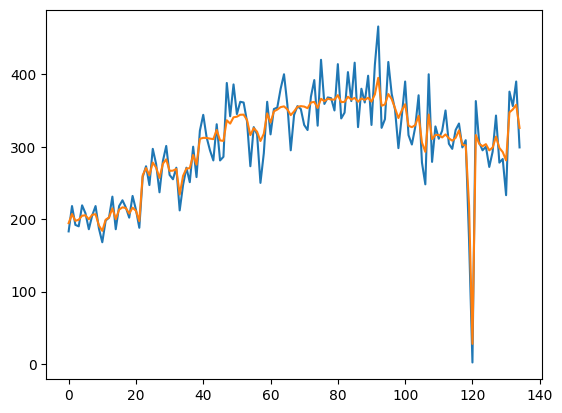

In [35]:
plot_eval(pred_train, y_train)

2729.0018851523996
181.93345901015996


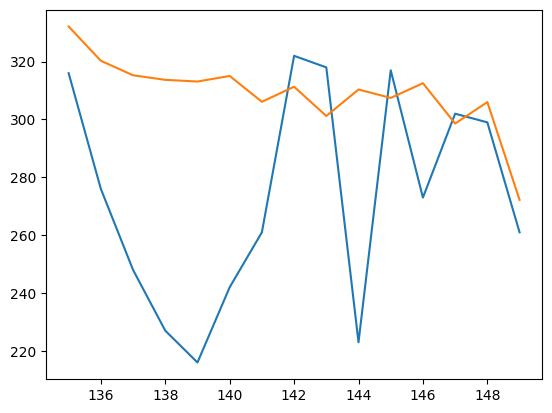

In [36]:
plot_eval(pred_test, y_test)

Model type not supported


UnboundLocalError: local variable 'imp' referenced before assignment

In [24]:
pred = rfmodel.predict(modernize(X_train))

In [29]:
out = bake(y_train, y_test, pred_train, pred_test, pred)

In [30]:
out

,pred,actual,group
0,183.000000,194.410601,train
1,218.000000,206.954874,train
2,192.000000,197.568638,train
3,190.000000,199.154658,train
4,219.000000,204.696073,train
...,...,...,...
148,299.000000,306.017403,test
149,261.000000,272.212144,test
0,270.657490,NaN,pred
1,265.469015,NaN,pred


(array([], dtype=int64), array([], dtype=int64))

In [24]:
out.to_csv("data/out/random.csv")

,n,group
0,153.000000,train
1,169.000000,train
2,184.000000,train
3,183.000000,train
4,218.000000,train
...,...,...
151,299.000000,test
152,261.000000,test
153,316.300000,pred
154,309.680000,pred
